In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Rutas de los archivos de Excel
file_path1 = 'EFCAMDAT1.xlsx'  # Actualiza con la ruta de tu primer archivo
file_path2 = 'EFCAMDAT2.xlsx'  # Actualiza con la ruta de tu segundo archivo

# Cargar los datos de ambos archivos
data1 = pd.read_excel(file_path1)
data2 = pd.read_excel(file_path2)

# Combinar los DataFrames
combined_data = pd.concat([data1, data2], ignore_index=True)

# Ver el DataFrame combinado
combined_data

,writing_id,learner_id,learner_id_categorical,nationality,l1,cefr,cefr_numeric,level,unit,topic_id_original,...,topic,secondary_topic,topic_to_keep,date,time,grade,wordcount,mtld,text,text_corrected
0,961,130930,130930.0,br,Portuguese,A1,1,1,1,1,...,Introducing yourself by email,english,both topics,40614,23:24:33.520,78,41,67.240000,"\n\t Hi, My name's Leon. I don't speak englis...","Hi, My name's Leon. I don't speak english, but..."
1,1523,18131,18131.0,sa,Arabic,A1,1,1,1,1,...,Introducing yourself by email,name,both topics,40617,02:24:17.907,83,24,26.880000,\n\t Hi.... From: To: Date: Hi! How are you? ...,Hi.... From: To: Date: Hi! How are you? My nam...
2,2817,8501,8501.0,cn,Mandarin,A1,1,1,1,1,...,Introducing yourself by email,name,both topics,40617,11:21:38.090,82,25,43.750000,\n\t Dear Anna: I'm Xudong. I'm 33 years old....,Dear Anna: I'm auding. I'm 33 years old. Nice ...
3,2887,13162,13162.0,fr,French,A1,1,1,1,1,...,Introducing yourself by email,name,both topics,40617,12:57:02.390,96,35,42.875000,"\n\t Hello! Nice to meet you. I am fine, than...","bello! Nice to meet you. I am fine, thanks. Ho..."
4,2286,152797,152797.0,br,Portuguese,A1,1,1,1,1,...,Introducing yourself by email,english,both topics,40617,20:47:14.560,90,44,108.416000,\n\t Hi teacher! How are you? My name's Marco...,Hi teacher! How are you? My name's Marcos Mala...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723277,839087,148694,148694.0,de,German,C1,5,15,6,118,...,Writing an article about a superstore,the,will,41712,08:36:18.883,100,236,73.635503,\n\t This is about a current and quite delica...,This is about a current and quite delicate iss...
723278,809057,61664,61664.0,br,Portuguese,C1,5,15,6,118,...,Writing an article about a superstore,the,will,41714,12:13:06.060,70,180,90.000000,\n\t Brazilian government don't take advantag...,Brazilian government don't take advantage from...
723279,1194073,172462,172462.0,jp,Japanese,C1,5,15,6,118,...,Writing an article about a superstore,the,will,41714,23:11:19.140,80,159,84.551124,\n\t Foreigners were arrested by fake plice o...,foreigners were arrested by fake place officer...
723280,1103878,133121,133121.0,it,Italian,C1,5,15,6,118,...,Writing an article about a superstore,the,will,41715,10:13:06.110,100,148,108.948685,"\n\t CRIMEA, PARLIAMENT REQUIRES RUSSIAN ANNE...","CIMA, PARLIAMENT REQUIRES RUSSIAN ANNEXATION R..."


In [4]:
# Mantener solo las columnas 'cefr' y 'text_corrected'
filtered_data = combined_data[['cefr', 'text_corrected']]

# Crear la columna 'id' incremental
filtered_data['id'] = range(1, len(filtered_data) + 1)

# Renombrar las columnas
filtered_data.rename(columns={'text_corrected': 'sentence', 'cefr': 'difficulty'}, inplace=True)

# Ver el DataFrame final
print(filtered_data)

# Ver el DataFrame final
filtered_data.to_excel('training_data.xlsx', index=False)

C:\Users\steve\AppData\Local\Temp\ipykernel_20832\4217035767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['id'] = range(1, len(filtered_data) + 1)
C:\Users\steve\AppData\Local\Temp\ipykernel_20832\4217035767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={'text_corrected': 'sentence', 'cefr': 'difficulty'}, inplace=True)


       difficulty                                           sentence      id
0              A1  Hi, My name's Leon. I don't speak english, but...       1
1              A1  Hi.... From: To: Date: Hi! How are you? My nam...       2
2              A1  Dear Anna: I'm auding. I'm 33 years old. Nice ...       3
3              A1  bello! Nice to meet you. I am fine, thanks. Ho...       4
4              A1  Hi teacher! How are you? My name's Marcos Mala...       5
...           ...                                                ...     ...
723277         C1  This is about a current and quite delicate iss...  723278
723278         C1  Brazilian government don't take advantage from...  723279
723279         C1  foreigners were arrested by fake place officer...  723280
723280         C1  CIMA, PARLIAMENT REQUIRES RUSSIAN ANNEXATION R...  723281
723281         C1  President Delma accused Of divert Public Money...  723282

[723282 rows x 3 columns]


In [5]:
difficulty_counts = filtered_data['difficulty'].value_counts()
difficulty_counts

difficulty
A1    341155
A2    215344
B1    116539
B2     40238
C1     10006
Name: count, dtype: int64

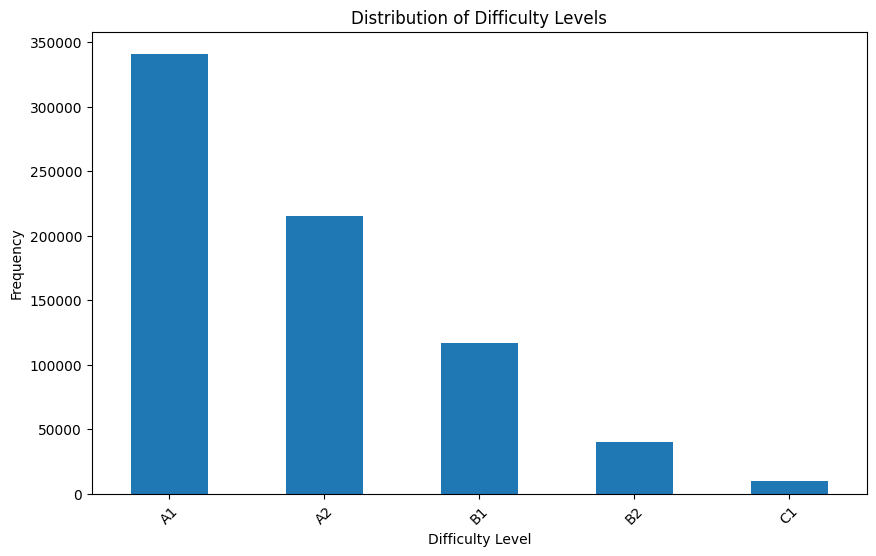

In [6]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
difficulty_counts.plot(kind='bar')
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Calculer la longueur de chaque phrase
filtered_data['sentence_length'] = filtered_data['sentence'].apply(len)

C:\Users\steve\AppData\Local\Temp\ipykernel_20832\3333203738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentence_length'] = filtered_data['sentence'].apply(len)


In [8]:
average_lengths = filtered_data.groupby('difficulty')['sentence_length'].mean()


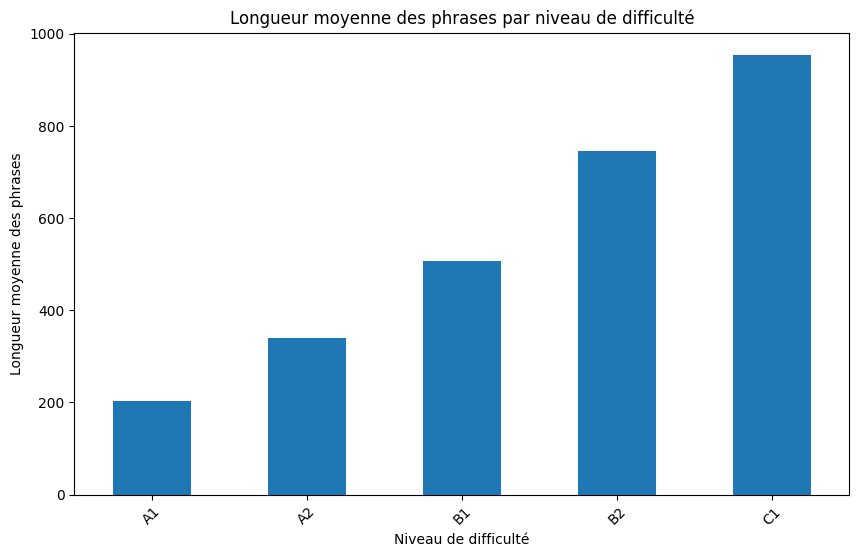

In [9]:
import matplotlib.pyplot as plt

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
average_lengths.plot(kind='bar')
plt.title('Longueur moyenne des phrases par niveau de difficulté')
plt.xlabel('Niveau de difficulté')
plt.ylabel('Longueur moyenne des phrases')
plt.xticks(rotation=45)
plt.show()


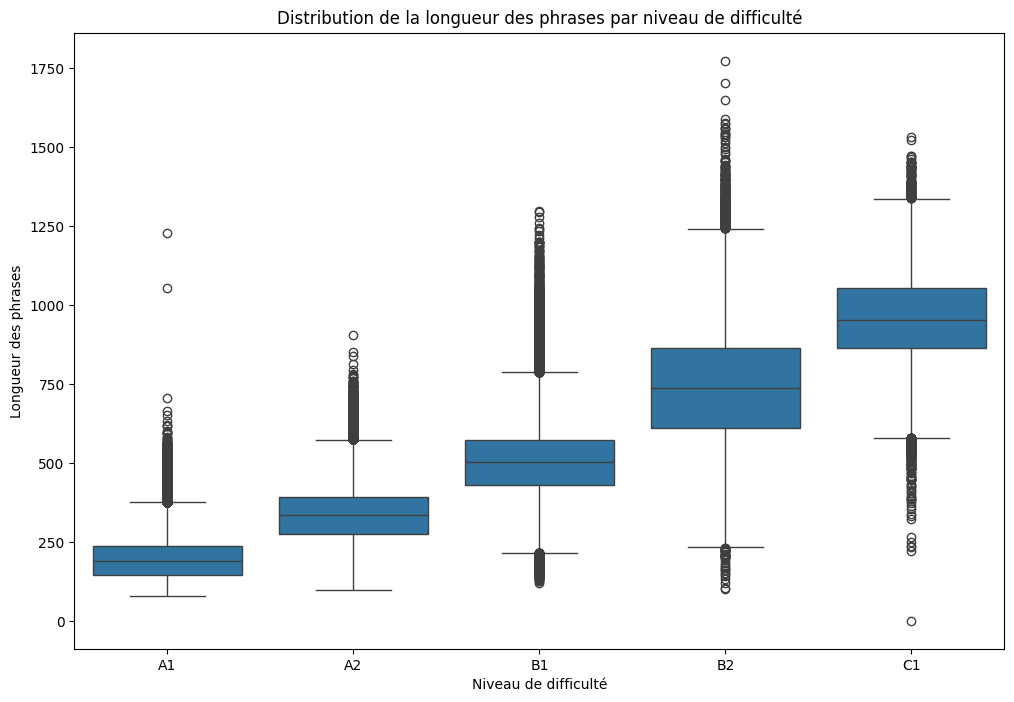

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='difficulty', y='sentence_length', data=filtered_data)
plt.title('Distribution de la longueur des phrases par niveau de difficulté')
plt.xlabel('Niveau de difficulté')
plt.ylabel('Longueur des phrases')
plt.show()


In [11]:
# Identifier les doublons
duplicates = filtered_data[filtered_data.duplicated(subset='sentence', keep=False)]

# Compter les doublons
num_duplicates = duplicates.shape[0]

print(f"Nombre de phrases en double : {num_duplicates}")


Nombre de phrases en double : 304


In [12]:
# Calcul de l'IQR
Q1 = filtered_data['sentence_length'].quantile(0.25)
Q3 = filtered_data['sentence_length'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = filtered_data[(filtered_data['sentence_length'] < lower_bound) | (filtered_data['sentence_length'] > upper_bound)]

print(f"Nombre d'outliers détectés : {outliers.shape[0]}")


Nombre d'outliers détectés : 28487


In [13]:
# Afficher les outliers, si vous souhaitez les examiner
if outliers.shape[0] > 0:
    print("Voici les outliers détectés :")
    print(outliers)
else:
    print("Aucun outlier détecté.")


Voici les outliers détectés :
       difficulty                                           sentence      id  \
310012         A2  Pavel Smirnoff 12, 8 Marta st. 127083 Moscow ,...  310013   
310439         A2  At'n SRM marketing recruitment department, My ...  310440   
310461         A2  CV Danilo Domenick Gonaives Rua paoli n'106 ap...  310462   
310795         A2  Sara She ## Zhujiang Road Nanjing 210000 China...  310796   
311420         A2  Perla Luna ayuntamiento 214 Toluca 52168 Mexic...  311421   
...           ...                                                ...     ...   
723277         C1  This is about a current and quite delicate iss...  723278   
723278         C1  Brazilian government don't take advantage from...  723279   
723279         C1  foreigners were arrested by fake place officer...  723280   
723280         C1  CIMA, PARLIAMENT REQUIRES RUSSIAN ANNEXATION R...  723281   
723281         C1  President Delma accused Of divert Public Money...  723282   

        s